<a href="https://colab.research.google.com/github/1234HrishiPai/3sigma/blob/master/ROKU_1Y_EMA_20D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#choosing stock, establishing timeframe and allowing access to JSON file from Investors Exchange API

ticker = 'ROKU'
timeframe = '1y'
token = "pk_bb1a52655d0741608ae137029c00a401"

In [0]:
df = pd.read_json('https://cloud.iexapis.com/stable/stock/'+ticker+'/chart/'+timeframe+'?token='+token+'')

In [4]:
df.head()

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2019-01-04,30.68,33.73,34.11,30.51,15505498,30.68,33.73,34.11,30.51,15505498,0.00,0.0000,"Jan 4, 19",0.000000
1,2019-01-07,36.83,42.18,42.98,36.52,42253658,36.83,42.18,42.98,36.52,42253658,8.45,25.0519,"Jan 7, 19",0.250519
2,2019-01-08,43.98,40.88,44.48,37.91,44167682,43.98,40.88,44.48,37.91,44167682,-1.30,-3.0820,"Jan 8, 19",0.211977
3,2019-01-09,40.39,42.10,43.59,39.65,19848180,40.39,42.10,43.59,39.65,19848180,1.22,2.9843,"Jan 9, 19",0.248147
4,2019-01-10,41.11,40.16,42.71,40.01,17148805,41.11,40.16,42.71,40.01,17148805,-1.94,-4.6081,"Jan 10, 19",0.190631


In [0]:
#isolating close prices

df1 = df[['close']].copy()
df1.reset_index(level=0,inplace=True)
df1.columns=['days','price']

In [6]:
df1.head()

,days,price
0,0,33.73
1,1,42.18
2,2,40.88
3,3,42.10
4,4,40.16


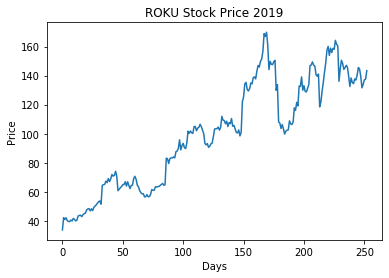

In [7]:
#plotting ROKU close prices from a year ago

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set(title='ROKU Stock Price 2019',
       ylabel='Price',
       xlabel='Days')

ax.plot(df1.days, df1.price)
plt.show()

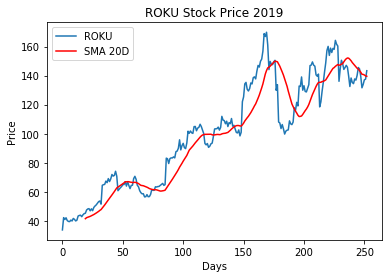

In [8]:
simple_moving_average = df1.price.rolling(window=20).mean()

df1.loc[:,'SMA_20D']=simple_moving_average 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title='ROKU Stock Price 2019',
       ylabel='Price',
       xlabel='Days')

plt.plot(df1.days, df1.price, label='ROKU')
plt.plot(df1.days, simple_moving_average, label='SMA 20D', color='red')

plt.legend(loc='best')
plt.show()

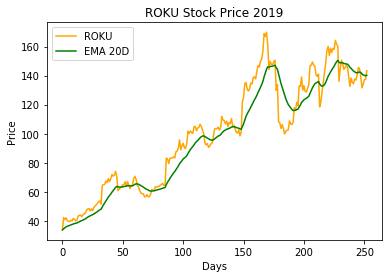

In [9]:
exp_moving_average = df1.price.ewm(span=20, adjust=False).mean()

df1.loc[:,'EMA_20D']=exp_moving_average

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title='ROKU Stock Price 2019',
       ylabel='Price',
       xlabel='Days')

plt.plot(df1.days, df1.price, label='ROKU', color='orange')

plt.plot(df1.days, exp_moving_average, label='EMA 20D',color='green')

plt.legend(loc='upper left')
plt.show()

In [10]:
''' 
TO-DO

- correct abovementioned warning to prevent chained indexing (DONE, new dataframe must be COPIED from the original)
- install and import matplotlib.finance library to represent data as CANDLESTICKS
- generate new series of tangents with window of 20 days, fit to EMA curve
- check condition: how many tangent lines cut through close-low wick. 
- scoring system for tangent with the greatest number of low-wick intercepts.


'''


' \nTO-DO\n\n- correct abovementioned warning to prevent chained indexing (DONE, new dataframe must be copied from the original)\n- install and import matplotlib.finance library to represent data as CANDLESTICKS\n- generate new column of tangents with window of 20 days, fit to EMA curve\n- check condition: how many tangent lines cut through close-low wick. \n- scoring system for tangent with the greatest number of low-wick intercepts.\n\n\n'